$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 1: Linear Regression

Yashad Samant

## Overview

The basic objective of this assignment is to use linear regression algorithm to predict future data. There are other small objectives like gathering the data, converting it into a form which can be easily used to implement the alogorithm. We cannot take into consideration a general data but we can try to make program as flexible as possible, like taking into consideration null values in data set. 
Basically, program is divided into three main parts, namely extracting data, main program, plotting output. While extracting data, I have used np.loadtxt as I don't have wget in my laptop. 
I have used matplotlib to plot the results. The heart of this program is based on three functions, train, use & rmse. 
Train is responsible to give us the mean and standard deviation of each column. We take mean and standard deviation to restrict the data between 0 and 1. Because the data is usually haywired. Example- weight of a car may be in tonnes but car may be 2 or 4 or 6 doors. So, if weight of both the attributes are 1, and as weight and attribute values are being multiplied effect of weight will be more than the doors. 
Second fuction is use. Use returns the predicted value of a certtain attribute with respect to the other attributes. 
Third is the rmse function which returns the error between target and predicted values. 
With this we are able to predict the values of a certain attribute with linear model formed with use function and calculate error between predicted and target values with rmse.        

## Method

Include latex math formulas defining the formula that is being minimized, and the matrix calculation for finding the weights.  Define in code cells the following functions as discussed in class.  Your functions' arguments and return types must be as shown here.

  * ```model = train(X,T)```
  * ```predict = use(model,X)```
  * ```error = rmse(predict,T)```
  
Let ```X``` be a two-dimensional matrix (```np.array```) with each row containing one data sample, and ```T``` be a two-dimensional matrix of one column containing the target values for each sample in ```X```.  So, ```X.shape[0]``` is equal to ```T.shape[0]```.  

<font color="red">UPDATE (January 25):</font> Function ```train``` must standardize the input data in ```X``` and return a dictionary with the keys ```means```, ```stds```, and ```w```.  Function ```use``` must also standardize its input data X by use the means and standard deviations in the dictionary returned by ```train```.




## Data

Pick a data set of interest to you.  There are many sources of data online.  The site [List of Public Data Sources Fit for Machine Learning](https://blog.bigml.com/list-of-public-data-sources-fit-for-machine-learning/) can be very helpful.

Describe the data you use in your example application.  Mention the source, and the names and meanings of each attribute. Include some plots of the data. Describe some observations you make about the plots.

Data used in this problem is from University of California, Irvine Machine learning repository. It is segmented among the categorical data with 14 attributes. The attributes are as follows -:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10.TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


In [106]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


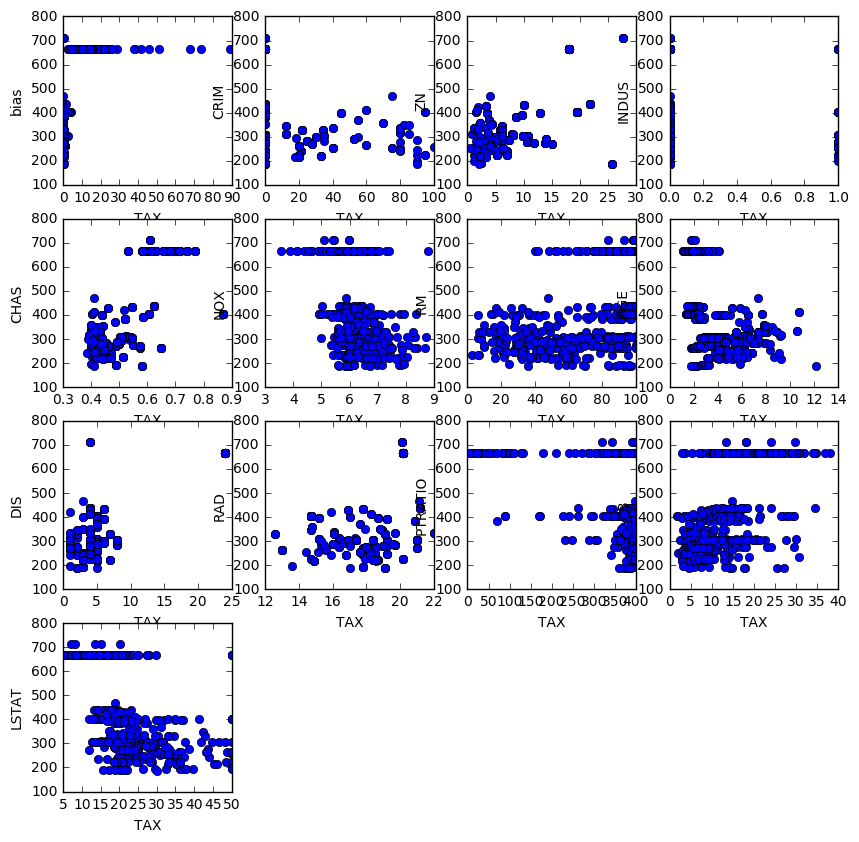

In [107]:
data = np.loadtxt("C:/Users/Yashad/Desktop/Books/Soft_apps/housing.data")

names =  ['CRIM','ZN','INDUS','CHAS','NOX',
          'RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

#Separating TAX & storing in variable T
T = data[:, [9]] 
X = data[:, [0,1,2,3,4,5,6,7,8,10,11,12,13]] 

Xnames = ['CRIM','ZN','INDUS','CHAS', 'NOX',
          'RM','AGE','DIS','RAD','PTRATIO','B','LSTAT','MEDV']  
Tname = names[9] # Assigning TAX to Tname
Xnames.insert(0, 'bias') # adding bias column(ones) 

#Plotting tax with respect to other elements to check dependence
plt.figure(figsize=(10,10))
nrow,ncol = X.shape
for c in range(ncol):
    plt.subplot(4,4, c+1)
    plt.plot(X[:,c],T,'o')
    plt.ylabel(Xnames[c])
    plt.xlabel(Tname)


## Results

In [108]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 30 16:16:07 2017

@author: Yashad
"""

#Defining Train
def train(X,T):
     #Calcylating mean and standard deviation using numpy 
     means = np.mean(X,axis=0)
     stds = np.std(X,axis=0)
     #Normalizing data set so that data is between 0 and 1   
     Xs = (X - means) / stds   
     Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs))
     #Calculating weight matrix
     w = np.linalg.lstsq( np.dot(Xs1.T,Xs1), np.dot(Xs1.T, T) )[0]
     final = {'means':means ,'stds':stds, 'w':w}
     return final

#Deining Use
def use(model,X):
     #Extracting weight, mean & standard deviation matrix from model function
     w = model['w']
     means = model['means']
     stds = model['stds']
     #Normalizing data set so that data is between 0 and 1 
     Xs = (X - means) / stds
    
     Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs))  
     #Performing linear regression and predicting test values 
     prediction = np.dot(Xs1,w)
    
     return prediction

#Defining rmse
def rmse(predict,T):
     #Calculating error between target and predicted values
     error = np.sqrt(np.mean((predict - T)**2,axis=0))
    
     return error


#MAIN


#Calling Train function
model = train(X,T)
#Train return values
w = model['w']
means = model['means']
stds = model['stds']

#Calling use function
predict = use(model,X)

#Calling rmse function
error = rmse(predict,T)
print(error)



#Weight values of tax with respect to other elements    
for wi,name in zip(w.flat,Xnames):
    print('{:8.3f}  {:s}'.format(wi,name)) 

[ 55.49339623]
 408.237  bias
  -2.481  CRIM
  20.454  ZN
  48.277  INDUS
  -5.712  CHAS
   5.016  NOX
  -1.031  RM
   2.929  AGE
  -3.260  DIS
 122.958  RAD
   1.982  PTRATIO
  -0.225  B
  -7.937  LSTAT
 -15.940  MEDV


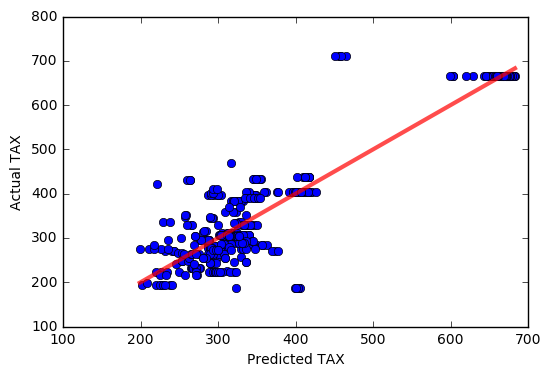

In [109]:
plt.plot(predict,T,'o')
plt.xlabel('Predicted TAX')
plt.ylabel('Actual TAX')
# add a 45 degree line
a = max(min(predict),min(T))
b = min(max(predict),max(T))
plt.plot([a,b],[a,b], 'r', linewidth=3,alpha=0.7);

We can see the attribute 'B' has negligible effect on the tax amount so we can cut down redundant data. After removing the attribute we can see there's minuscale effect on the error thus, reducing the pressure on the processor and also reducing time. With data as small as this we may not know th difference, but in practical applications data is in millions and thus by removind redundant data we save a lot of processing time.  

[ 55.49372731]
 408.237  bias
  -2.457  CRIM
  20.457  ZN
  48.292  INDUS
  -5.718  CHAS
   5.032  NOX
  -0.987  RM
   2.908  AGE
  -3.271  DIS
 123.014  RAD
   1.960  PTRATIO
  -7.911  LSTAT
 -15.998  MEDV


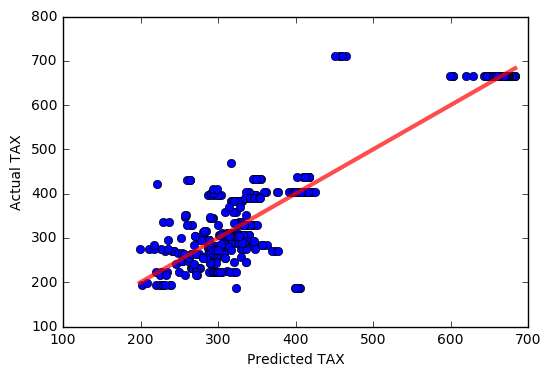

In [110]:
data = np.loadtxt("C:/Users/Yashad/Desktop/Books/Soft_apps/housing.data")

names =  ['CRIM','ZN','INDUS','CHAS','NOX',
          'RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV']

#Separating TAX & storing in variable T
T = data[:, [9]] 
X = data[:, [0,1,2,3,4,5,6,7,8,10,12,13]] 

Xnames = ['CRIM','ZN','INDUS','CHAS', 'NOX',
          'RM','AGE','DIS','RAD','PTRATIO','LSTAT','MEDV']  
Tname = names[9] # Assigning TAX to Tname
Xnames.insert(0, 'bias') # adding bias column(ones) 

#Calling Train function
model = train(X,T)
#Train return values
w = model['w']
means = model['means']
stds = model['stds']

#Calling use function
predict = use(model,X)

#Calling rmse function
error = rmse(predict,T)
print(error)



#Weight values of tax with respect to other elements    
for wi,name in zip(w.flat,Xnames):
    print('{:8.3f}  {:s}'.format(wi,name)) 
    
plt.plot(predict,T,'o')
plt.xlabel('Predicted TAX')
plt.ylabel('Actual TAX')
# add a 45 degree line
a = max(min(predict),min(T))
b = min(max(predict),max(T))
plt.plot([a,b],[a,b], 'r', linewidth=3,alpha=0.7);    

Show the values of the resulting weights and discuss which ones might be least relevant for fitting your linear model.  Remove them, fit the linear model again, plot the results, and discuss what you see.

## Grading

Your notebook will be run and graded automatically.  Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs480/notebooks/A1grader.tar) and extract `A1grader.py` from it. After running all of the above cells in your notebook, run the code in the following cell to demonstrate an example grading session.  You should see a perfect score of 100/100 if your functions are defined correctly.

In [111]:
%run -i "A1grader.py"

20/20 points. 'means' values are correct.
20/20 points. 'stds' values are correct.
20/20 points. 'w' values are correct.
20/20 points. Values returned by 'use' are correct.
20/20 points. rmse() is correct.
C:\Users\Yashad\Desktop\Books\Soft_apps Grade is 100/100


## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/28803).

Grading will be based on 

  * correct behavior of the three functions listed above,
  * easy to understand plots in your notebook
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.